In [37]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import pymc3 as pm

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Simple linear regression

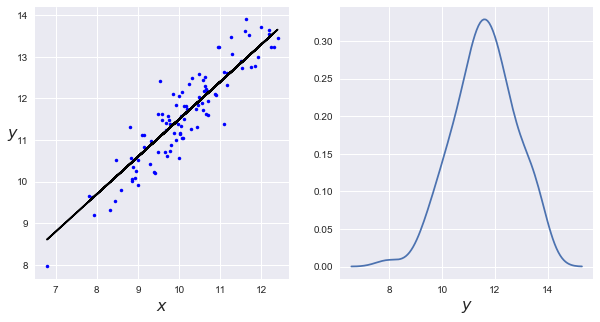

In [90]:
np.random.seed(314)
n = 100
alpha_real = 2.5
beta_real = 0.9
eps_real = np.random.normal(0, 0.5, size=n)

x = np.random.normal(10, 1, n)
y_real = alpha_real + beta_real * x
y = y_real + eps_real

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(x, y, 'b.')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16, rotation=0)
plt.plot(x, y_real, 'k') # k is black, without a dot the points are connected by lines; since they're all in the same line we see a single line
plt.subplot(1,2,2)
sns.kdeplot(y)
plt.xlabel('$y$', fontsize=16)

In [91]:
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=1)
    epsilon = pm.HalfCauchy('epsilon', 5)
    
    mu = pm.Deterministic('mu', alpha + beta * x)
    y_pred = pm.Normal('y_pred', mu=mu, sd=epsilon, observed=y)
    
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(10000, step, start)

Optimization terminated successfully.
         Current function value: 72.345620
         Iterations: 13


100%|██████████| 10000/10000 [00:02<00:00, 3872.21it/s]

         Function evaluations: 23
         Gradient evaluations: 23


In [92]:
chain = trace[200:]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x130455400>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x127a626d8>]], dtype=object)

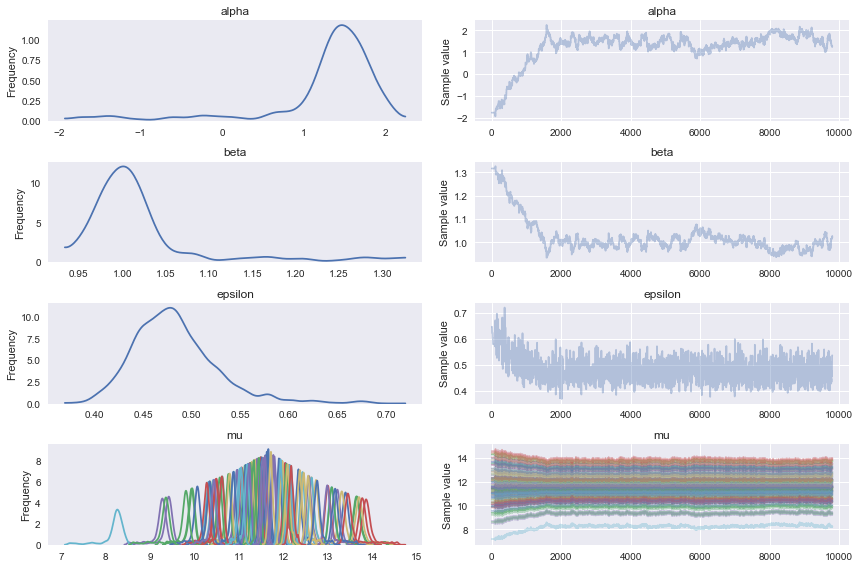

In [93]:
pm.traceplot(chain)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12add99e8>],
       [<matplotlib.axes._subplots.AxesSubplot object at 0x132cee470>]], dtype=object)

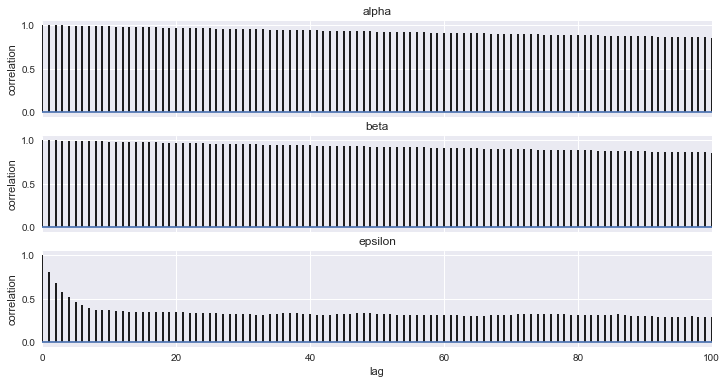

In [94]:
pm.autocorrplot(chain, ['alpha','beta','epsilon'])

In [95]:
# this is only effective in pymc3 when we have more than one trace - 
# why? doesn't the formula for using auto-correlation/getting ESS
# hold for a single chain? 
#pm.effective_n(chain)

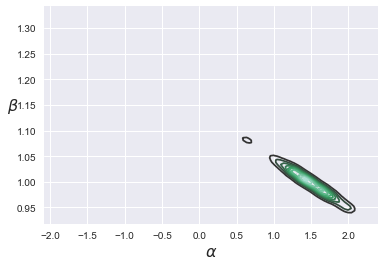

In [96]:
sns.kdeplot(chain['alpha'], chain['beta'])
plt.xlabel(r'$\alpha$', fontsize=16)
plt.ylabel(r'$\beta$', fontsize=16, rotation=0)

What if we center x?

In [97]:
np.mean(x)

10.129192299164298

In [98]:
x_centered = x - np.mean(x)
np.mean(x_centered)

2.7533531010703882e-16

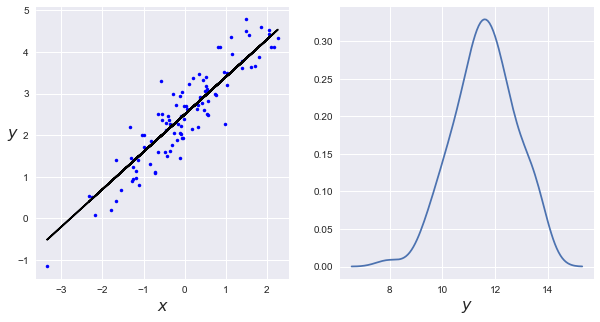

In [99]:
y_real_with_centered_x = alpha_real + beta_real * x_centered
y_with_centered_x = y_real_with_centered_x + eps_real

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(x_centered, y_with_centered_x, 'b.')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16, rotation=0)
plt.plot(x_centered, y_real_with_centered_x, 'k')
plt.subplot(1,2,2)
sns.kdeplot(y)
plt.xlabel('$y$', fontsize=16)

In [100]:
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=1)
    epsilon = pm.HalfCauchy('epsilon', 5)
    
    mu = pm.Deterministic('mu', alpha + beta * x_centered)
    y_pred = pm.Normal('y_pred', mu=mu, sd=epsilon, observed=y_with_centered_x)
    
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(10000, step, start)

Optimization terminated successfully.
         Current function value: 72.361106
         Iterations: 13
         Function evaluations: 24
         Gradient evaluations: 24


100%|██████████| 10000/10000 [00:02<00:00, 3816.49it/s]


In [101]:
chain = trace[200:]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x132e10320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x134d56ac8>]], dtype=object)

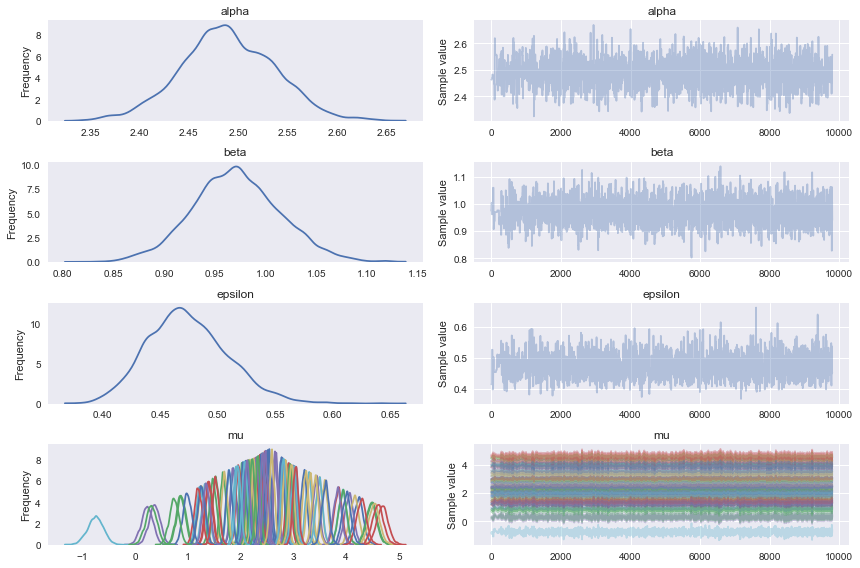

In [102]:
pm.traceplot(chain)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13614d0b8>],
       [<matplotlib.axes._subplots.AxesSubplot object at 0x13646f898>]], dtype=object)

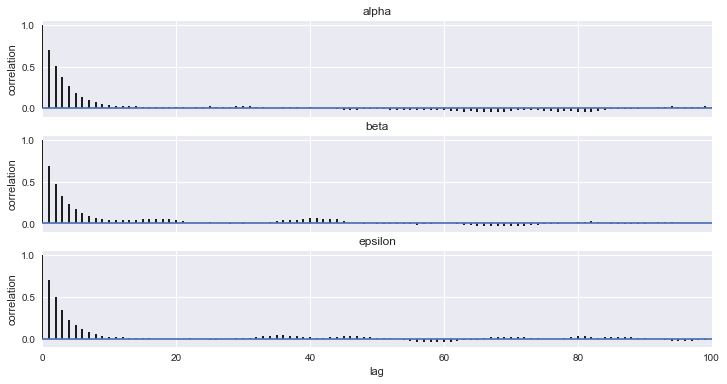

In [103]:
pm.autocorrplot(chain, ['alpha','beta','epsilon'])

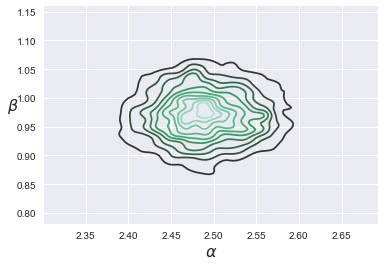

In [104]:
sns.kdeplot(chain['alpha'], chain['beta'])
plt.xlabel(r'$\alpha$', fontsize=16)
plt.ylabel(r'$\beta$', fontsize=16, rotation=0)